In [1]:
%run my_init.py

Mounted at /content/drive


In [2]:
%matplotlib inline

In [3]:
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
X_train_scaled = (X_train / 255.0)
X_train_scaled.shape

(60000, 28, 28)

In [5]:
from sklearn.model_selection import train_test_split

X_train_scaled, X_val_scaled, y_train, y_val = \
  train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)
X_train_scaled.shape, X_val_scaled.shape, y_train.shape, y_val.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

In [6]:
def model_fn2(*layers):
  model = keras.Sequential(name="fashion_mnist_model")
  model.add(keras.layers.Flatten(input_shape=(28, 28), name="input"))
  model.add(keras.layers.Dense(100, activation='relu', name="hidden_1"))
  for layer in layers:
    model.add(layer)
  model.add(keras.layers.Dense(10, activation='softmax', name="output"))
  return model

In [7]:
model = model_fn2()

In [8]:
model.summary()

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


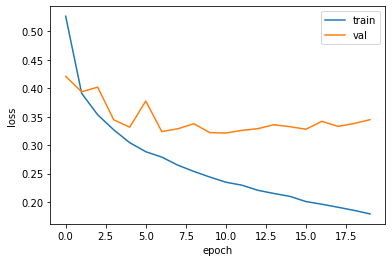

In [9]:
model.compile(optimizer = 'adam',loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, \
                    validation_data=(X_val_scaled, y_val))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
#dropout 추가
model = model_fn2(keras.layers.Dropout(0.3))
model.summary()

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


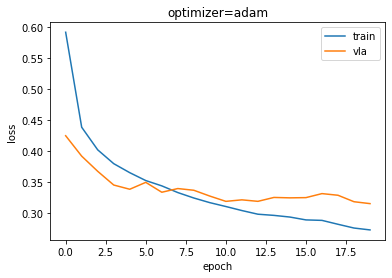

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('optimizer=adam')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','vla'])
plt.show()
#주황색 그래프가 낮아짐(추세만 보기)

In [12]:
models, histories = [],[]
#dropout 없는것 부터 하나씩
rates = np.arange(0.0,0.5,0.1)
for rate in rates:
  #소수점으로 작업해야할때는 np.arange
  model = model_fn2(keras.layers.Dropout(0.3))
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val))
  models.append(model)
  histories.append(history)



In [13]:
rates.size

5

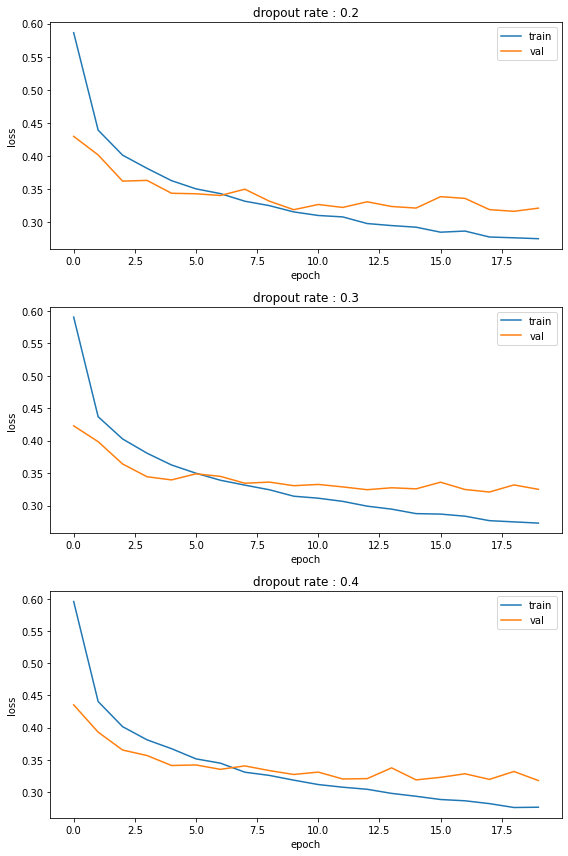

In [34]:
fig, axes = plt.subplots(rates.size,1,figsize=(8,12))
#가로가 8인치, 세로가 12인치
rates = np.arange(0.2, 0.5, 0.1)
for i,ax in enumerate(axes):
  ax.plot(histories[i].history['loss'])
  ax.plot(histories[i].history['val_loss'])
  ax.set_title(f"dropout rate : {rates[i]:.1f}")
  ax.set_xlabel('epoch')
  ax.set_ylabel('loss')
  ax.legend(['train','val'])
plt.tight_layout()
plt.show()

In [35]:
models

In [36]:
model = models[4]

In [37]:
model.layers

In [38]:
model.layers[2]

In [39]:
model.save_weights('model-drop-0_3-weights.h5')

In [40]:
model = model_fn2()
model.compile(optimizer = 'adam',loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, \
                    validation_data=(X_val_scaled, y_val))


In [22]:
model.load_weights('model-drop-0_3-weights.h5')

In [24]:
model.predict(X_val_scaled)

array([[0.16411261, 0.06735737, 0.06982215, ..., 0.08157966, 0.07013083,
        0.08627985],
       [0.09647582, 0.02632677, 0.04255503, ..., 0.14857686, 0.03991555,
        0.06972572],
       [0.19366811, 0.03271643, 0.0418188 , ..., 0.06568549, 0.0607122 ,
        0.07473144],
       ...,
       [0.20292653, 0.04375153, 0.04674284, ..., 0.07399648, 0.05753922,
        0.05119979],
       [0.1148865 , 0.01921252, 0.05098894, ..., 0.10325659, 0.05911187,
        0.08348721],
       [0.14310533, 0.03794724, 0.04386149, ..., 0.10486212, 0.0510602 ,
        0.11247715]], dtype=float32)

In [25]:
model.summary()

Model: "fashion_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 100)               78500     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 output (Dense)              (None, 10)                110       
                                                                 
Total params: 79,620
Trainable params: 79,620
Non-trainable params: 0
_________________________________________________________________


In [30]:
model = model_fn2(keras.layers.Dense(10,activation='relu'))
model.compile(optimizer = 'adam',loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0,validation_data=(X_val_scaled, y_val))
#오류난다.

In [ ]:
model.summary()

In [ ]:
#모델 자체를 저장 save
model.save('model-hidden-2.h5')

In [ ]:
new_model = keras.models.load_model('model-hidden-2.h5')
new_model.summary()
#model 불러오기

In [ ]:
X_test_scaled = (X_test / 255.0)
X_test_scaled.shape

In [ ]:
X_test_scaled[0:1]

In [ ]:
new_model.predict(X_test_scaled[0:1])
#첫번째 샘플은 맨 마지막 클래스가(앵클 부츠)

In [ ]:
new_model.predict(X_test_scaled).shape

In [ ]:
#가장 큰걸 꺼내기
np.argmax(new_model.predict(X_test_scaled),)

In [ ]:
y_test_pred_proba = new_model.predict(X_test_scaled)
y_test_pred_proba.shape

In [ ]:
np.argmax(y_test_pred_proba, axis=1).shape


In [ ]:
y_test_pred = np.argmax(y_test_pred_proba, axis=1)
#가장 큰것의 인덱스값이 반환
np.sum(y_test_pred == y_test)
#boolean값 반환, 맞힌 갯수

In [ ]:
np.mean(y_test_pred == y_test)
#정확도

In [ ]:
model.evaluate(X_test_scaled,y_test)
#mean과 evaluate의 값이 같다. evaluate는 모델을 다시 돌리기 때문에 predict 값을 안다면 그냥 np.mean을 추천

In [31]:
model = model_fn2(keras.layers.Dropout(0,3), keras.layers.Dense(10,activation='relu'))
model.compile(optimizer = 'adam',loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model_chkpoint = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=100, verbose=0, validation_data=(X_val_scaled, y_val), callbacks=[model_chkpoint, early_stopping])
#오류난다.

TypeError: ignored

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','vla'])
plt.show()

In [ ]:
early_stopping.stopped_epoch -2 #patience=2

In [33]:
model = model_fn2(keras.layers.Dropout(0.3), keras.layers.Dense(10, activation="relu"))
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model_chkpoint = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val),
                    callbacks=[model_chkpoint, early_stopping])